In [3]:
import numpy as np # Numeric calculation
import pandas as pd #Analysing data and reading CSV files
import matplotlib.pyplot as plt #For visualising data
import sklearn

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import seaborn as sns #For visualising data

### Using linear regression (simple or multiple), develop a model to predict the price of a house.
### Analyse the results and discuss the effectiveness of the model, outlining the improvements when developing the model.

In [4]:
df_p = pd.read_csv('./houseprice_data.csv')

In [5]:
df_p.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [133]:
df_p.shape

(21613, 19)

In [6]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

With the info above, there are no missing values and null values in the dataset.

In [7]:
df_p.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


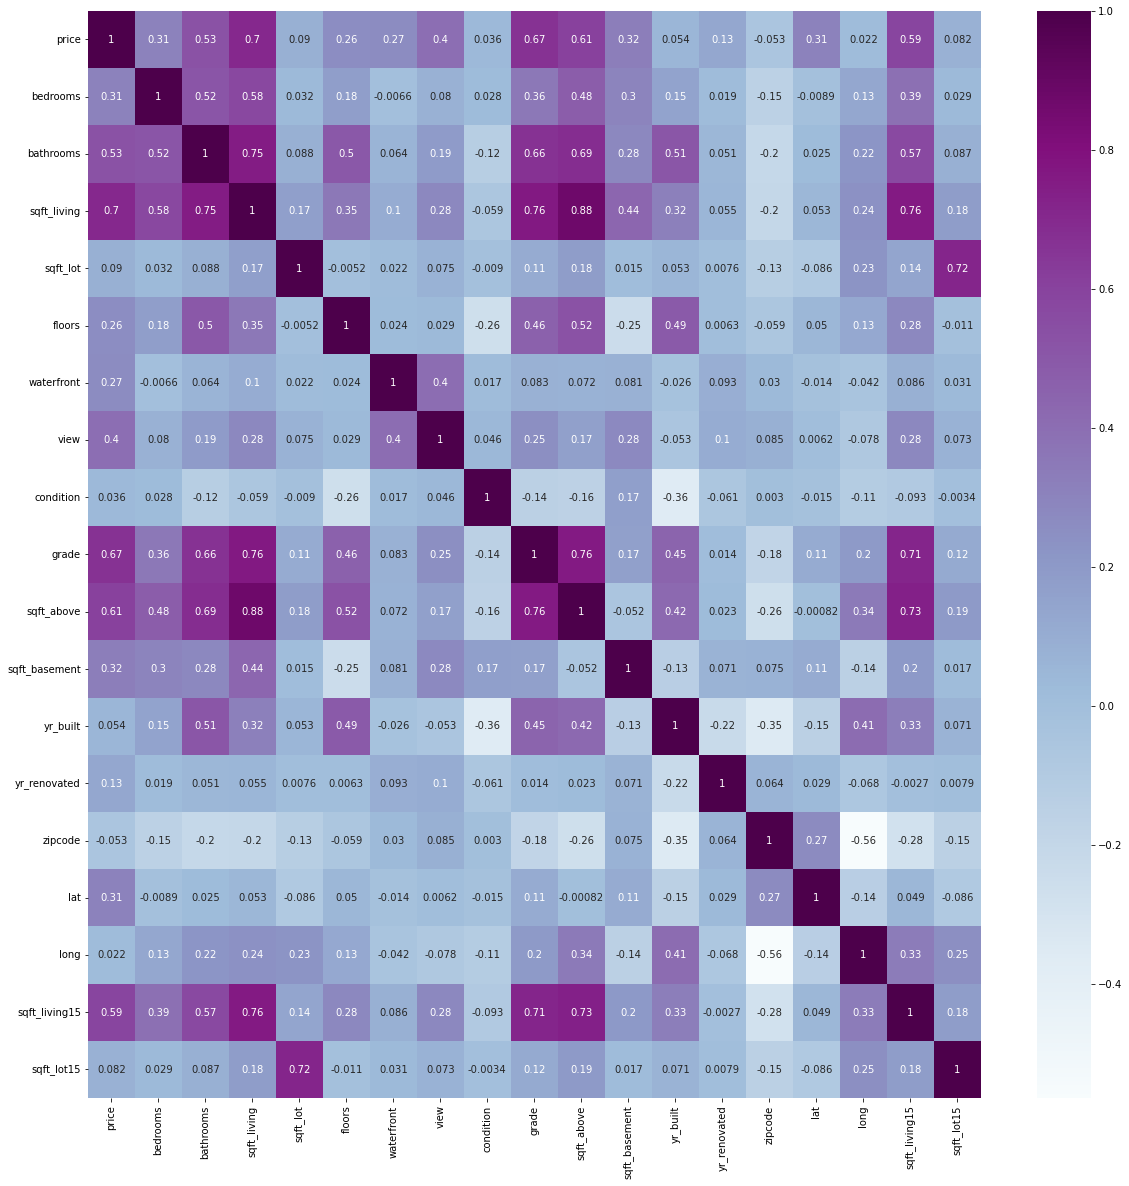

In [145]:
#Visualising the correlation between pairs of columns in the dataset
fig0 = plt.figure(figsize = (20,20))
sns.heatmap(data = df_p.corr(), annot = True, cmap = 'BuPu')
plt.show
fig0.savefig('Reg0.png')

## Simple Regression using one feature

From the figure above, the 'sqft_living' column has the highest correleation of 70% with the target variable, so we start with that as our independent variable. 

In [134]:
#Create X(sqft_living) & y(price)
X = df_p.iloc[:,[3]].values # Independent
y = df_p.iloc[:,0].values # target

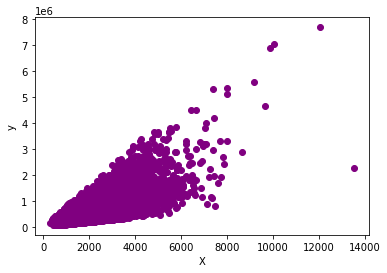

In [135]:
# visualise X & y
fig1, ax1 = plt.subplots()
ax1.scatter(X, y, color='purple')

ax1.set_xlabel('X')
ax1.set_ylabel('y')
fig1.savefig('Reg1.png')

In [136]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
       random_state=0 )

In [137]:
# fit the linear least-squares regression line on training set:
regline = LinearRegression()
regline.fit(X_train, y_train)


# The coefficients
print('Coefficients: ', regline.coef_)

# The intercept
print('Intercept: ', regline.intercept_)

# The mean squared error
print('Mean squared error: %.9f'% mean_squared_error(y_test, regline.predict(X_test)))

# The R^2 value:
print('Coefficient of determination: %.2f'% r2_score(y_test, regline.predict(X_test)))

Coefficients:  [278.50893905]
Intercept:  -38175.10461025115
Mean squared error: 70250068245.552902222
Coefficient of determination: 0.49


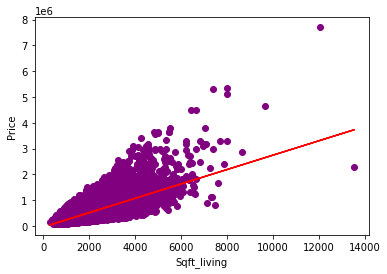

In [138]:
#Visualise training set results

fig2, ax2 = plt.subplots()

ax2.scatter(X_train, y_train, color='purple')
ax2.plot(X_train, regline.predict(X_train), color='red')

ax2.set_xlabel('Sqft_living')
ax2.set_ylabel('Price')

fig2.savefig('Reg1Train.png')

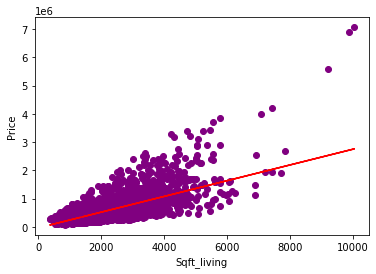

In [139]:
#Visualise testing set results

fig3, ax3 = plt.subplots()

ax3.scatter(X_test, y_test, color='purple')
ax3.plot(X_test, regline.predict(X_test), color='red')

ax3.set_xlabel('Sqft_living')
ax3.set_ylabel('Price')

fig3.savefig('Reg1Test.png')

## Multiple Regression

In [120]:
#Determine the correletion between pairs of columns in the dataset
df_p.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [121]:
df_p.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Using two features

In [122]:
#Using two features which have a high correlation with price: Bedroom = 31%, Bathroom = 53%
X = df_p.iloc[:, [1,2]].values
y = df_p.iloc[:, 0].values

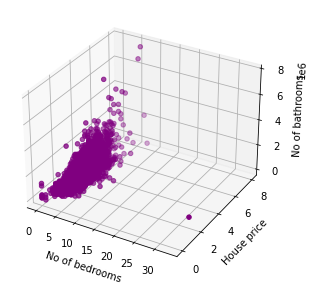

In [123]:
# plot both independent variables on one graph (3D plot for multiple regression)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection = '3d')

ax4.scatter(X[:, 0], X[:,1], y, color='purple')

ax4.set_xlabel('No of bedrooms')
ax4.set_ylabel('House price')
ax4.set_zlabel('No of bathrooms')

fig4.tight_layout()
fig4.savefig('3Dplt.png')

In [124]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3,
        random_state=0)

In [125]:
# fit the linear least-squares regression line to the training data:
regiine = LinearRegression()
regline.fit(X_train, y_train)

# The coefficients
print('Coefficients: ', regline.coef_)

# The intercept
print('Intercept: ', regline.intercept_)

# The mean squared error
print('Mean squared error: %.8f'% mean_squared_error(y_test, regline.predict(X_test)))

# The R^2 value:
print('Coefficient of determination: %.2f'% r2_score(y_test, regline.predict(X_test)))

Coefficients:  [ 23930.58960811 228472.65319737]
Intercept:  -23317.173145808396
Mean squared error: 103321044589.32844543
Coefficient of determination: 0.29


The Coefficient of determination of the linear regression is 0.29. This shows a weak linear elationship between house price, bedrooms and bathrooms.

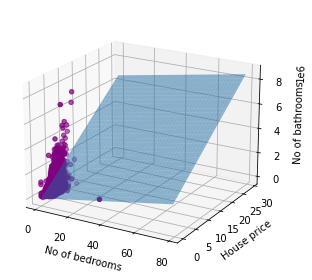

In [126]:
# plot both independent variables on one graph (3D plot for multiple regression)
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection = '3d')

ax5.scatter(X[:, 0], X[:,1], y, color='purple')

#plot the plane:
X1, X2 = np.meshgrid(range(80), range (30))
Z = regline.coef_[0]*X1 + regline.coef_[1]*X2 + regline.intercept_
ax5.plot_surface(X1, X2, Z, alpha=0.5)

#redirect the position of the plane
ax1.azim = 50
ax5.dist = 10
ax5.elev = 20 

ax5.set_xlabel('No of bedrooms')
ax5.set_ylabel('House price')
ax5.set_zlabel('No of bathrooms')

fig5.tight_layout()
fig5.savefig('3Dplt2.png')

### Using all features

In [132]:
#drop the price column to use the remaining columns as the independent variabes
X = df_p.drop("price", axis=1)
y = df_p["price"]

In [128]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
       random_state=0 )

In [129]:
# fit the linear least-squares regression line on training set:
regline = LinearRegression()
regline.fit(X_train, y_train)

LinearRegression()

In [130]:
cdf = pd.DataFrame(regline.coef_, X.columns, columns=['Coefficients'])
print(cdf)

                Coefficients
bedrooms       -31222.100940
bathrooms       37054.328342
sqft_living       106.536954
sqft_lot            0.238633
floors          12019.214296
waterfront     591676.965446
view            53548.963404
condition       26604.026435
grade           95816.225717
sqft_above         64.881362
sqft_basement      41.655592
yr_built        -2583.889049
yr_renovated       16.063903
zipcode          -525.277116
lat            606530.779223
long          -205547.315101
sqft_living15      28.851105
sqft_lot15         -0.477686


In [131]:
# The intercept
print('Intercept: ', regline.intercept_)

# The mean squared error
print('Mean squared error: %.5f'% mean_squared_error(y_test, regline.predict(X_test)))

# The R^2 value:
print('Coefficient of determination: %.2f'% r2_score(y_test, regline.predict(X_test)))

Intercept:  1945750.6837240178
Mean squared error: 42911289182.20768
Coefficient of determination: 0.69


The Coefficient of determination of the linear regression is 0.69, which means that about 70% of the data fit the regression model.